In [56]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Submodelo

In [57]:
class CustomLayer(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(1))
        self.b = torch.nn.Parameter(torch.randn(1))
        self.c = torch.nn.Parameter(torch.randn(1))
        self.d = torch.nn.Parameter(torch.randn(1))
         
    def forward(self, x):
        
        return self.a * x + self.b * x ** 2 + self.c * x ** 3 + self.d * x ** 4

### Modelo completo

In [58]:
class Model(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.bias = torch.nn.Parameter(torch.randn(1))
        self.custom_layer_block = CustomLayer()
        
    def forward(self, x):
        return  self.custom_layer_block(x) + self.bias

### Generacion de datos de entrenamiento 

In [59]:
x_np = (np.arange(40)-20)/40
y_np =  .1 * x_np + .2 * x_np ** 2 - .5 * x_np ** 3 +  .1 * x_np ** 4 - 3

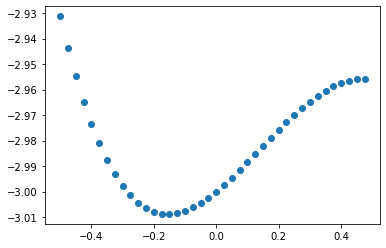

In [60]:
plt.scatter(x_np,y_np)

### Entrenamiento

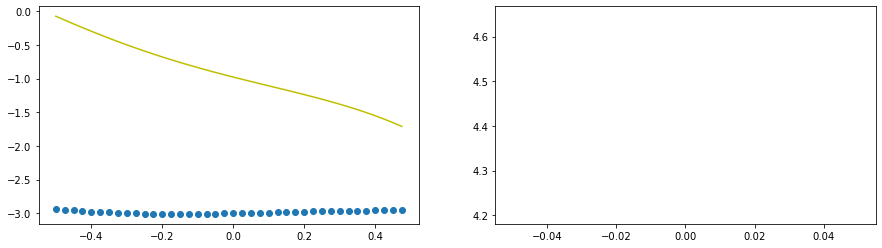

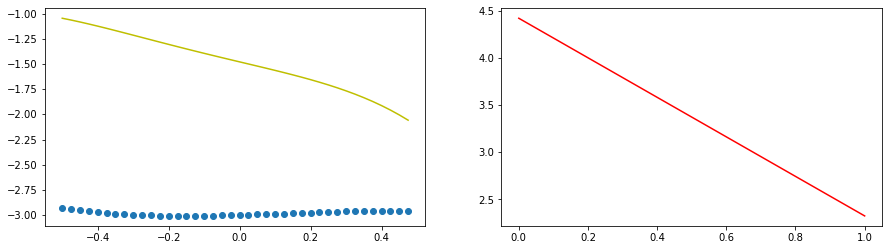

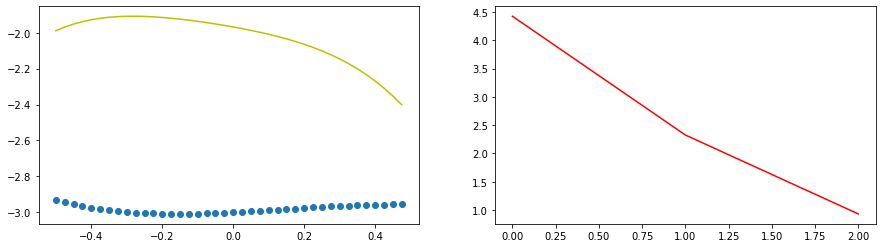

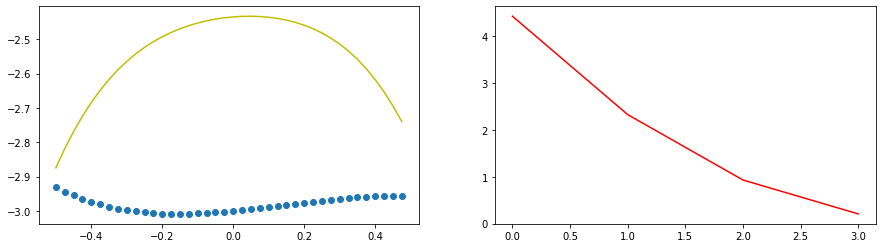

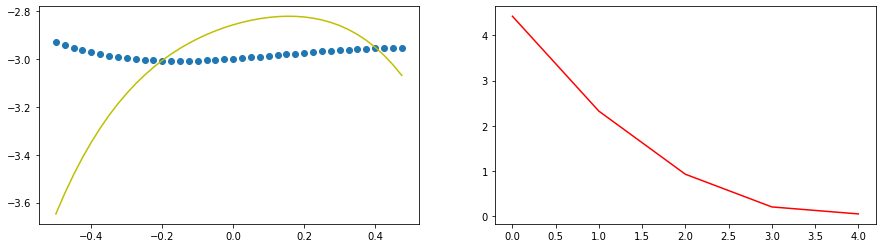

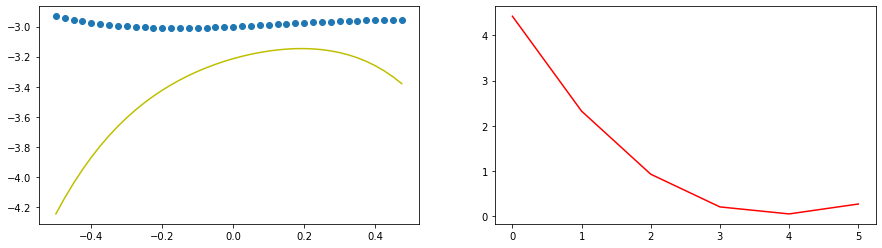

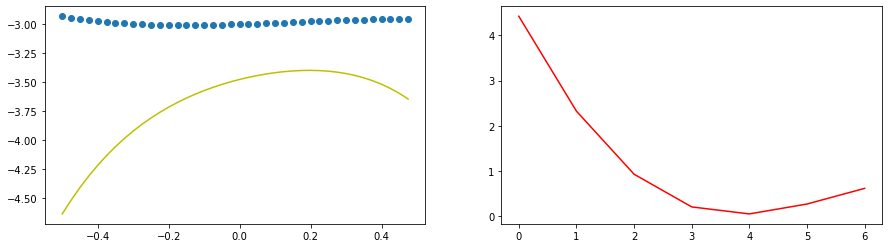

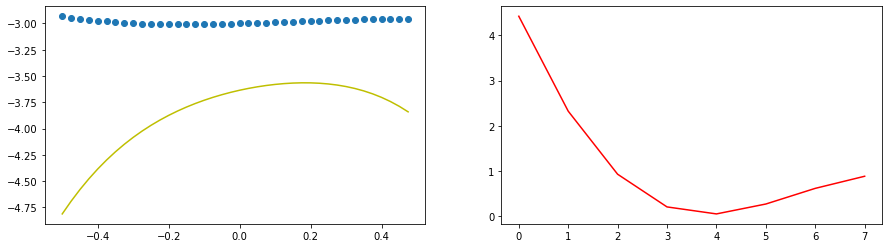

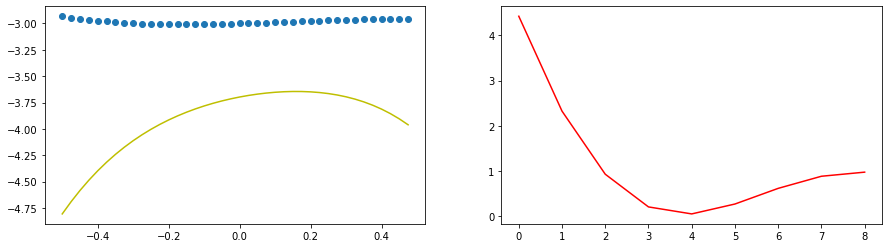

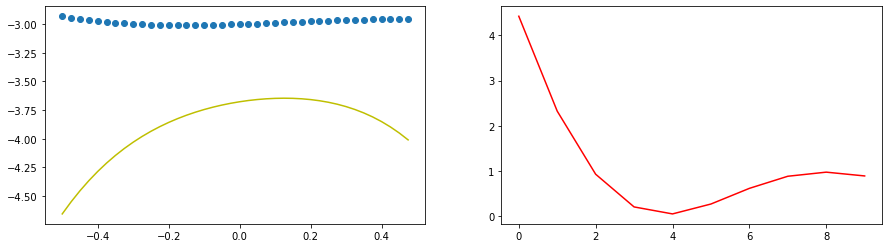

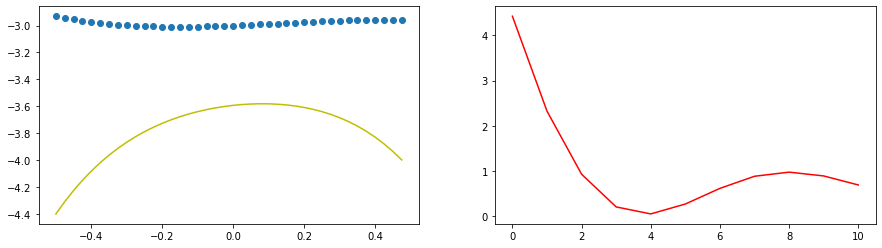

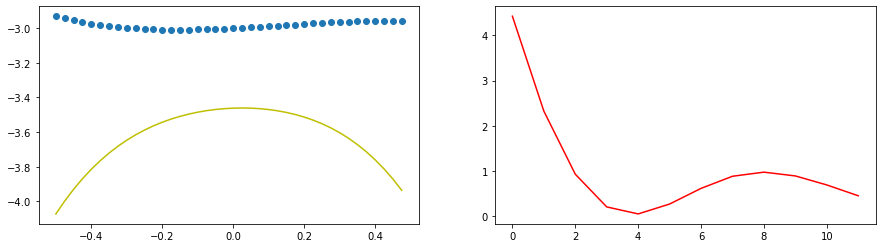

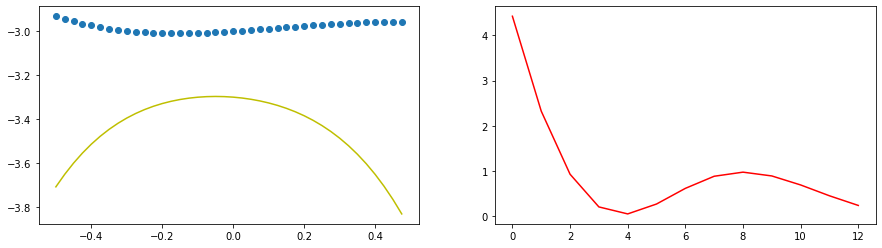

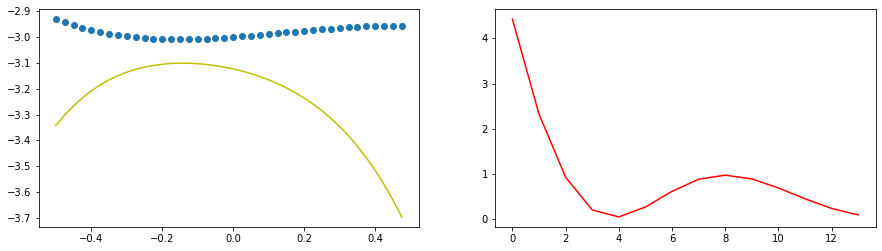

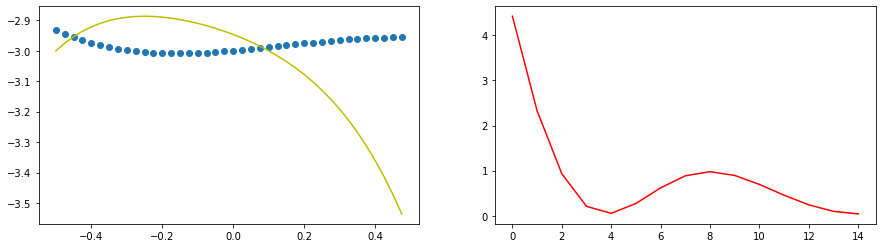

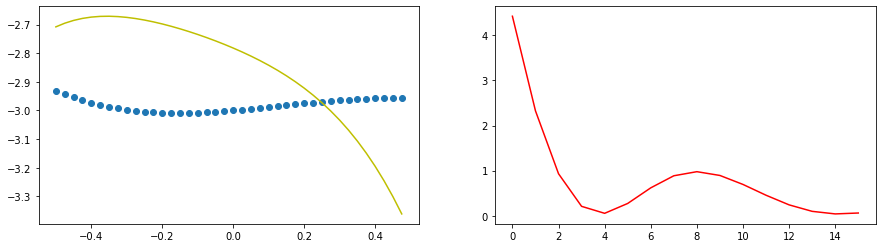

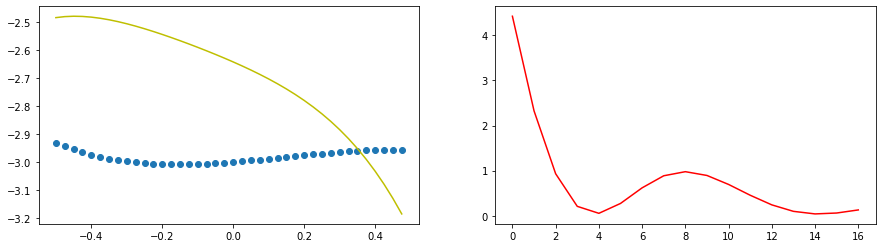

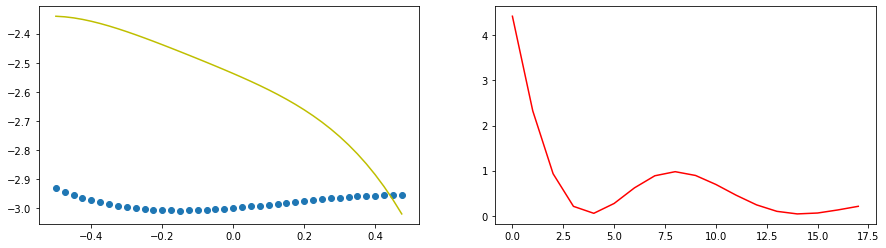

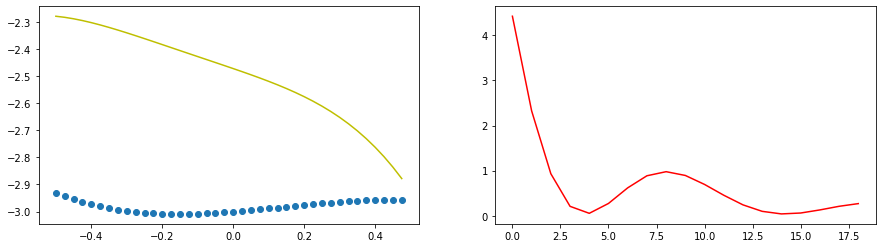

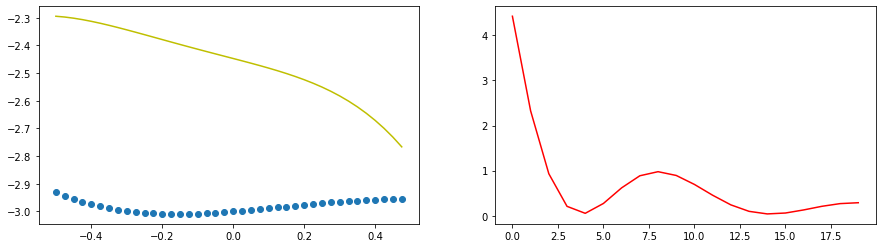

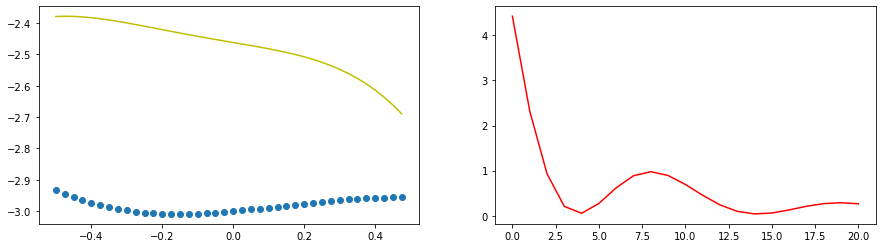

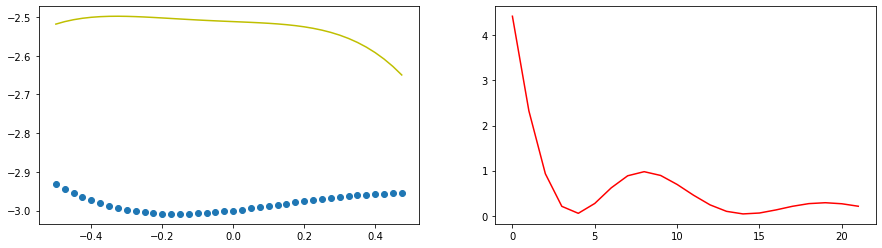

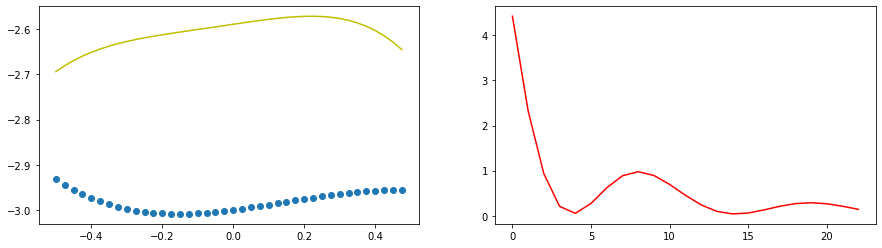

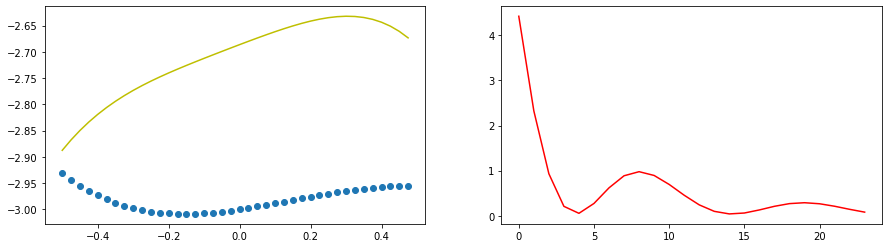

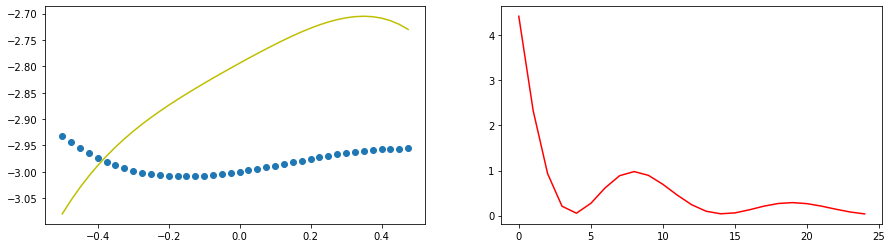

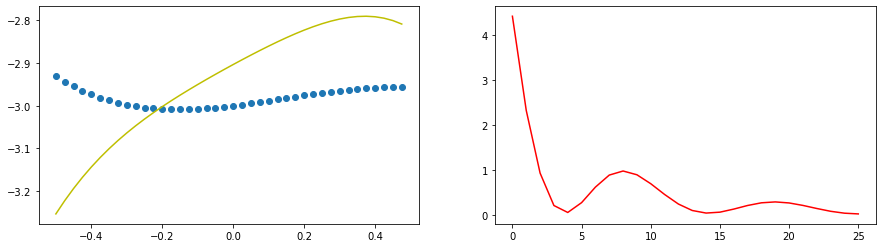

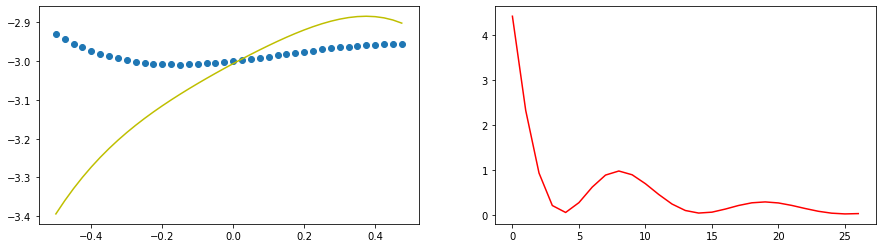

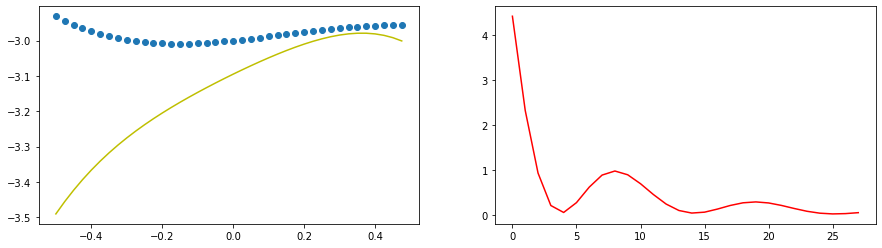

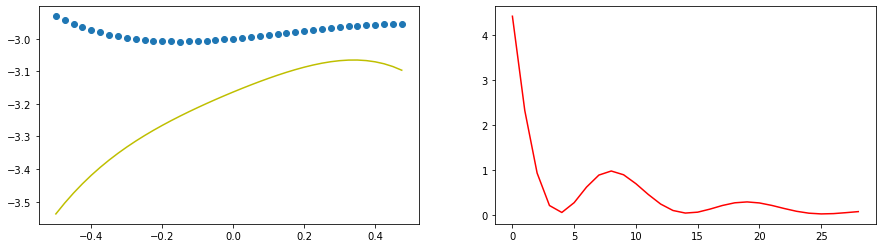

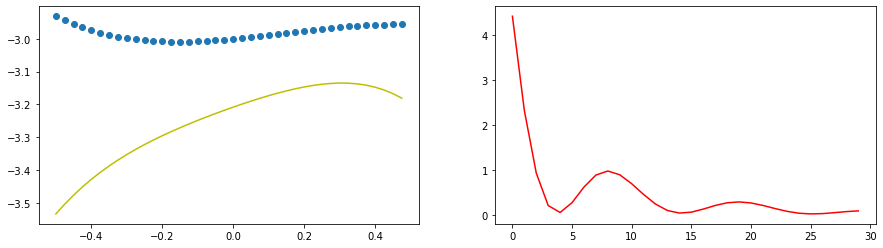

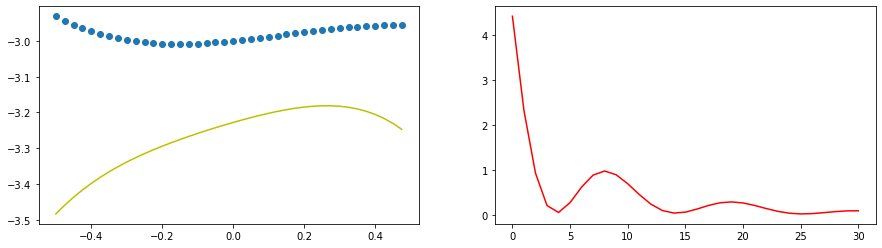

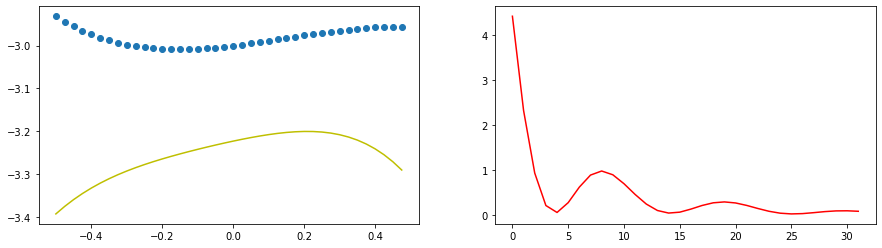

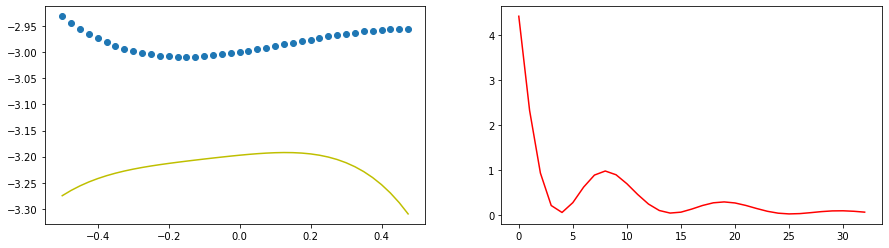

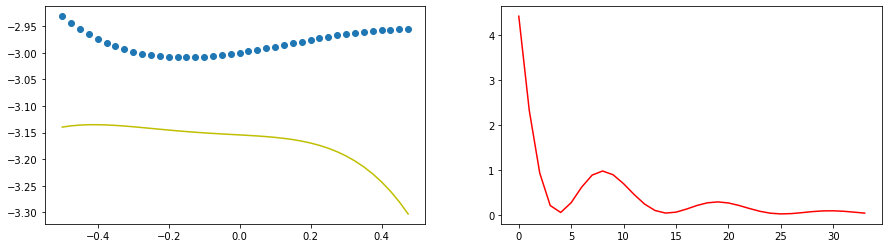

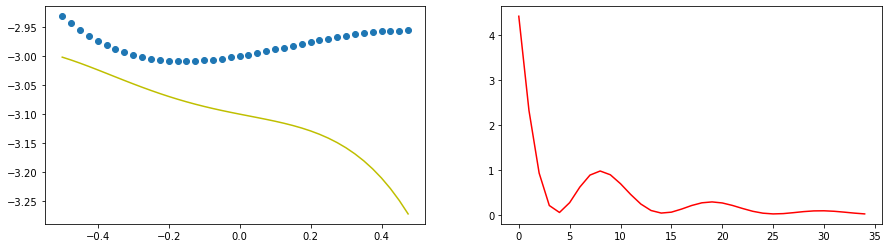

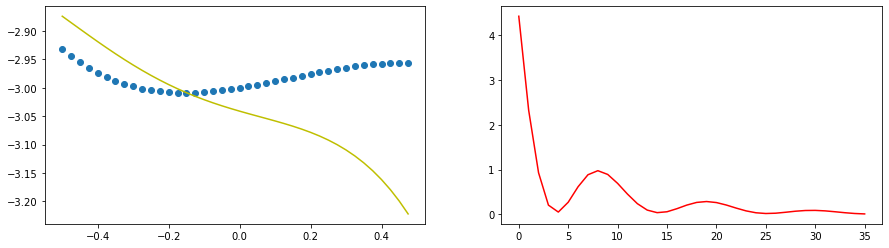

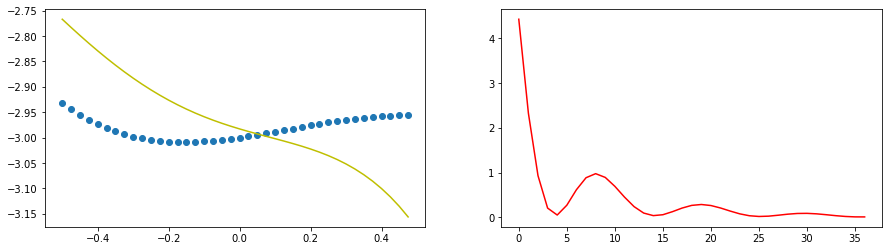

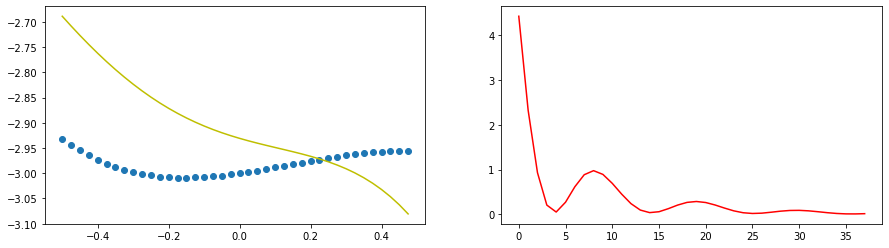

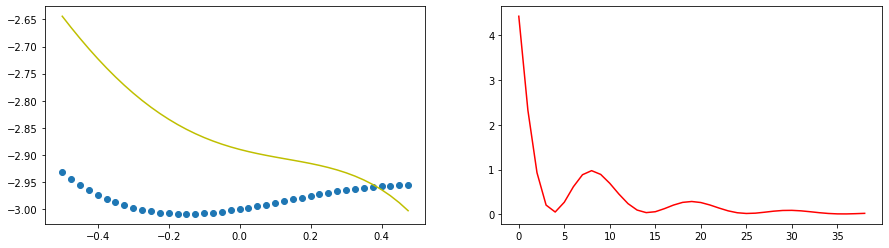

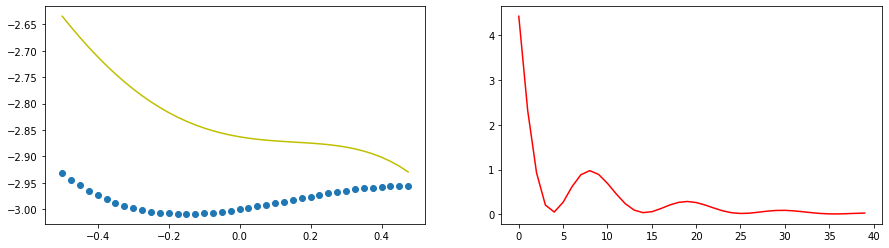

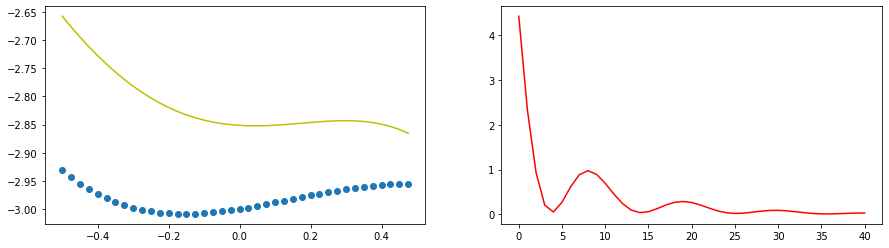

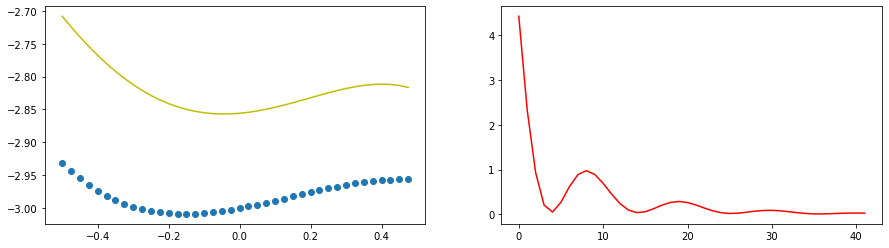

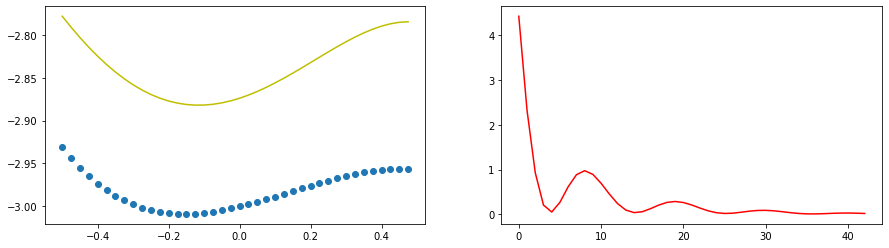

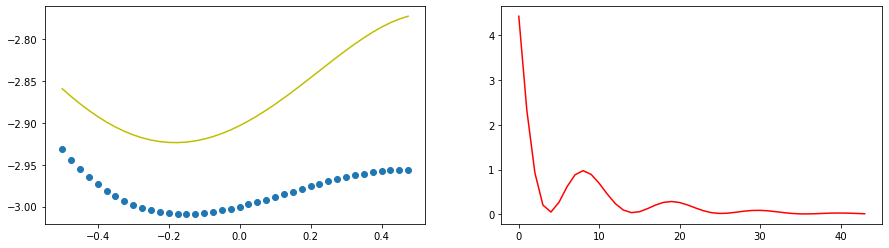

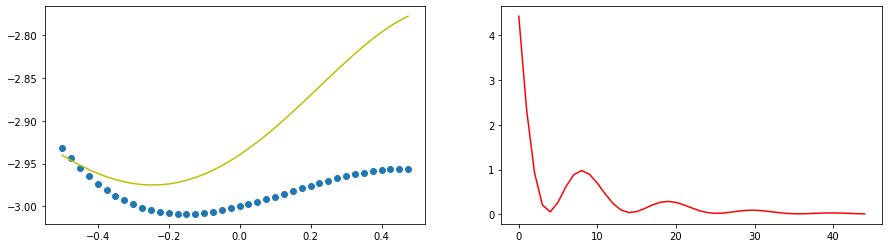

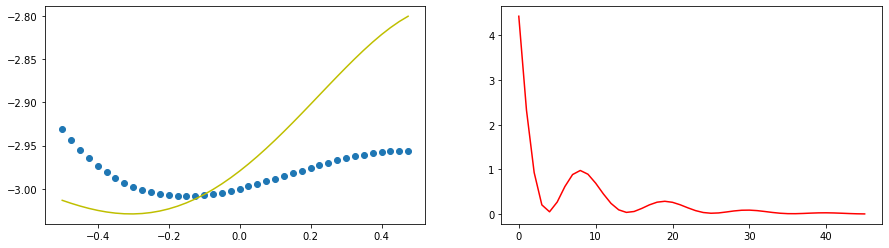

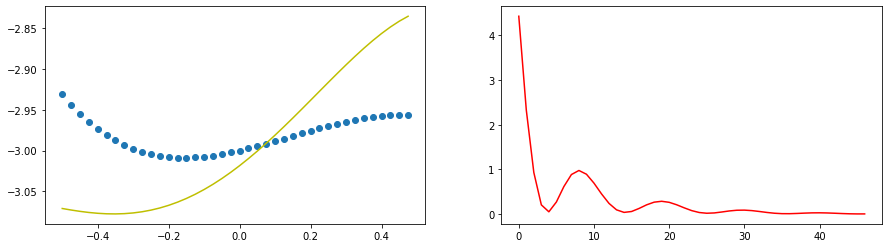

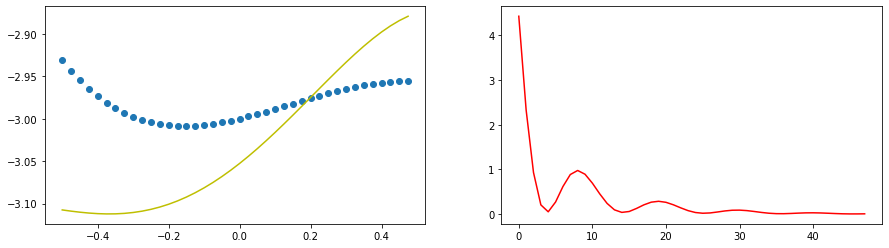

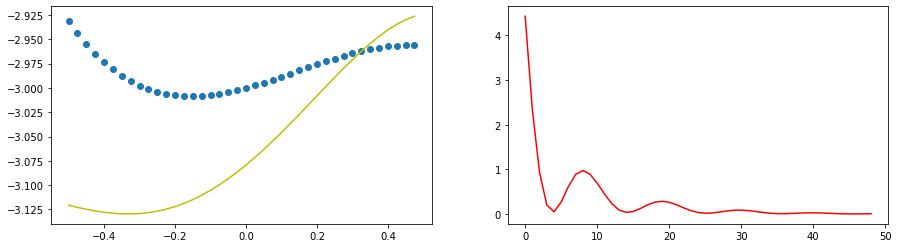

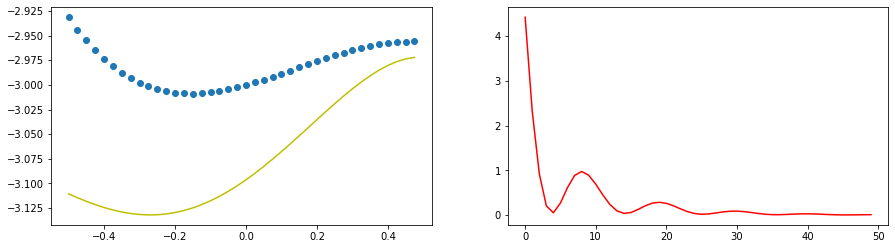

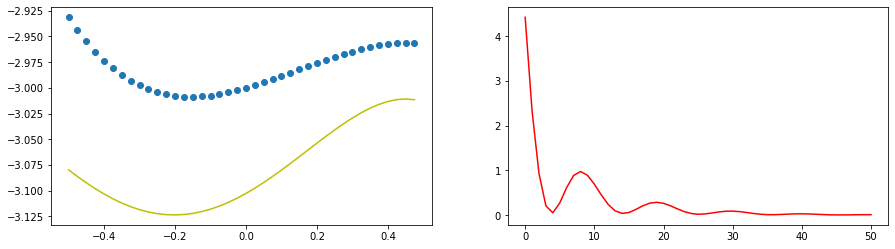

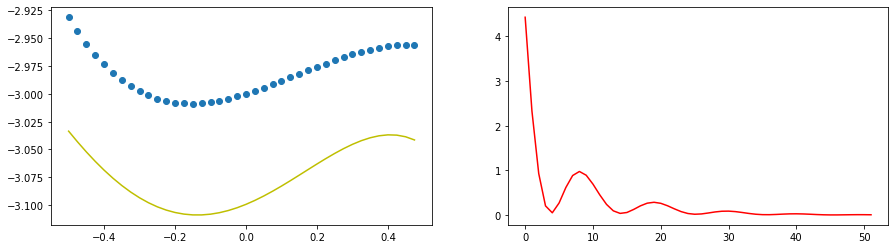

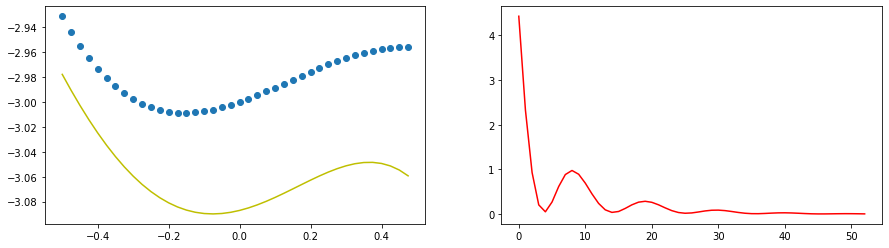

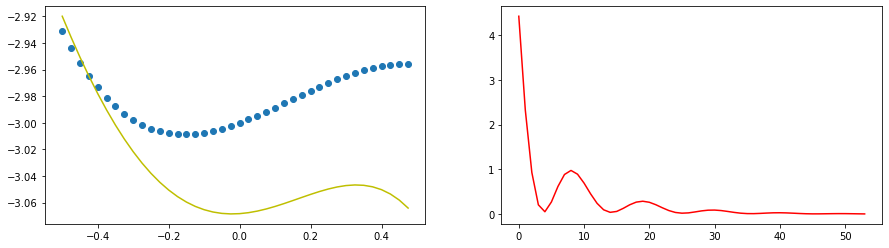

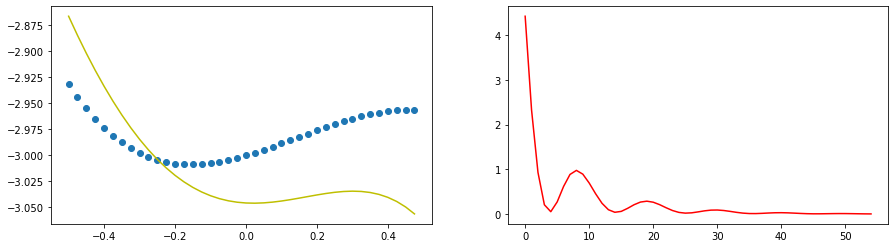

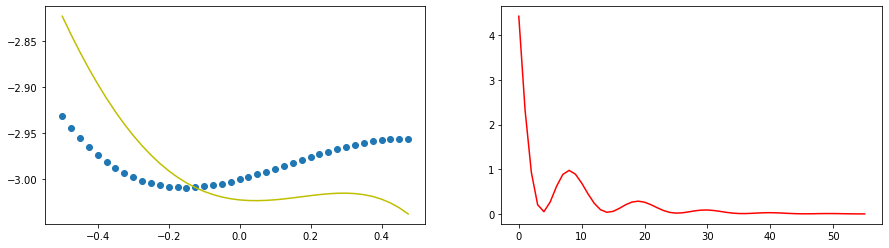

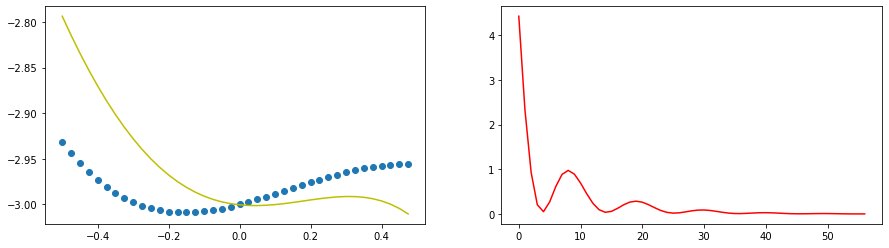

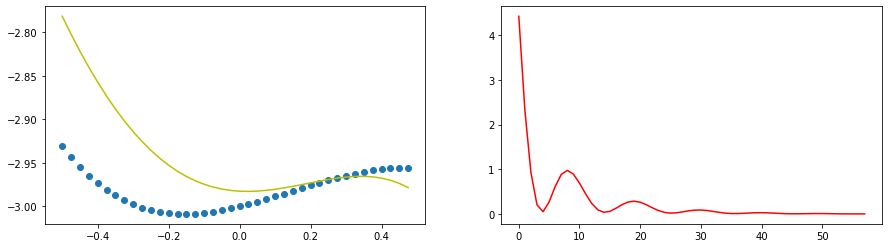

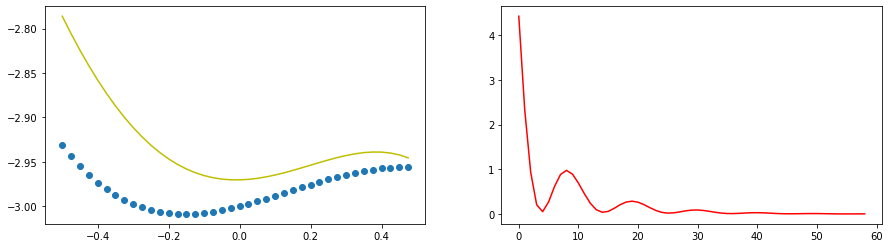

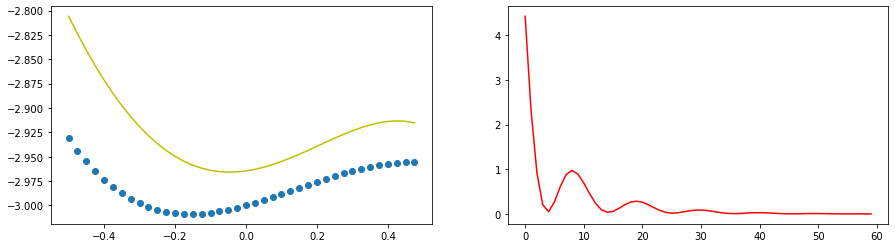

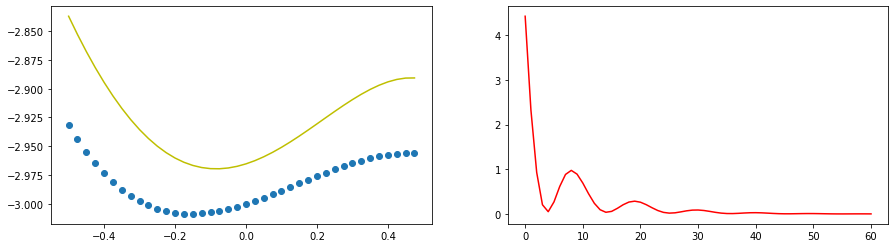

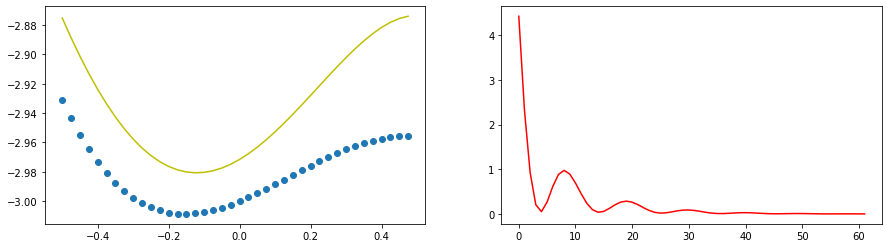

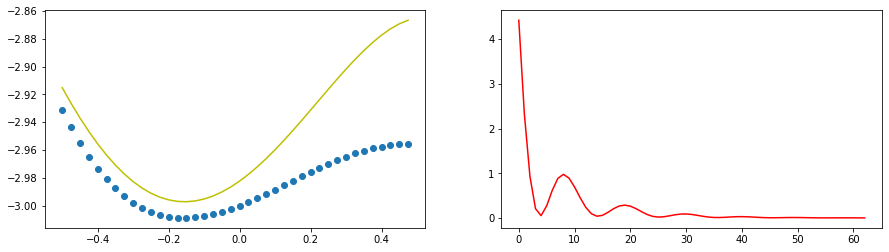

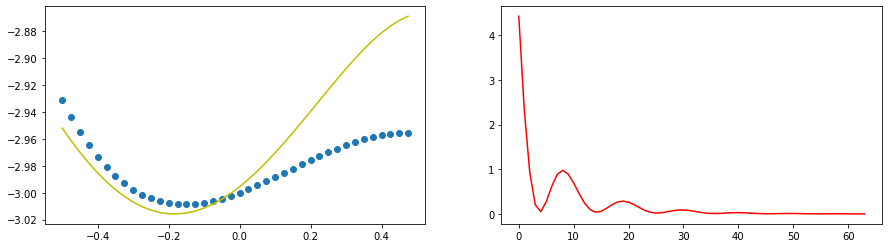

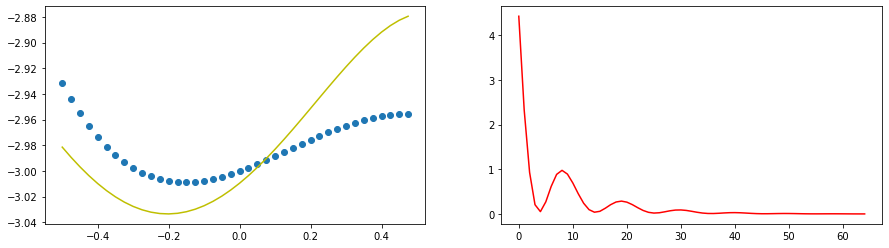

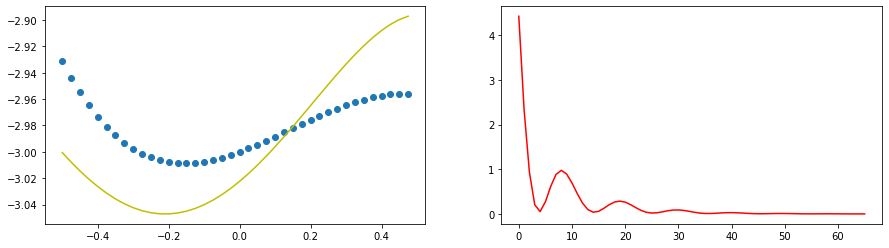

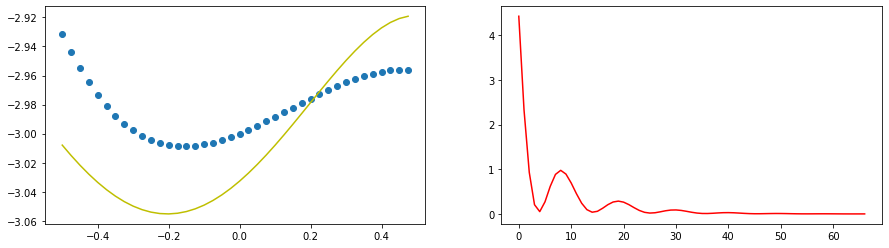

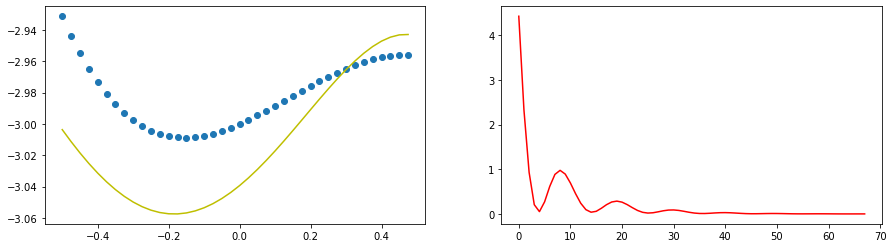

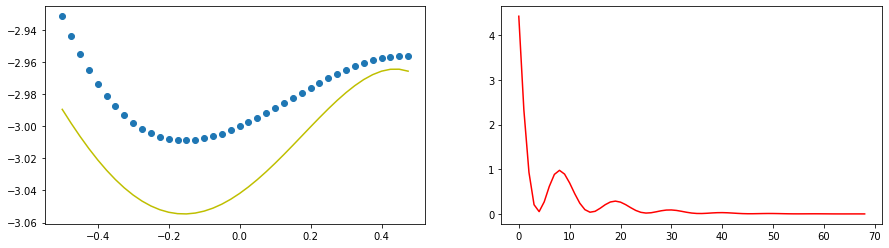

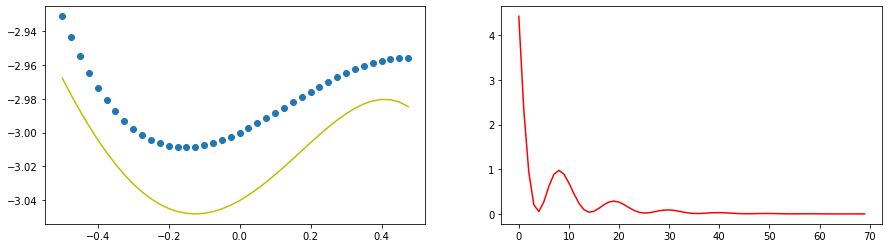

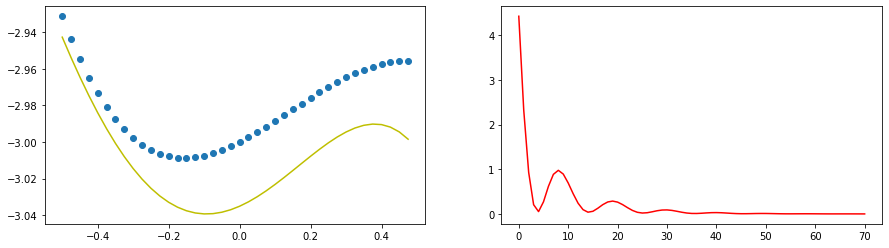

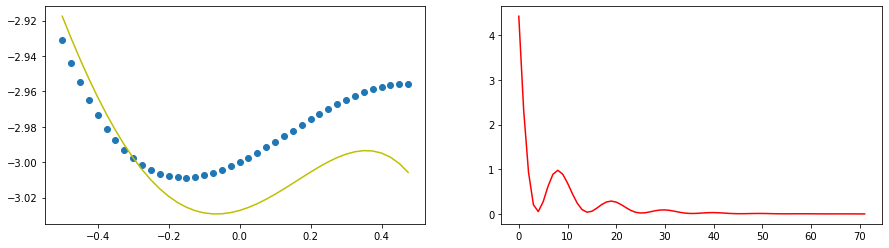

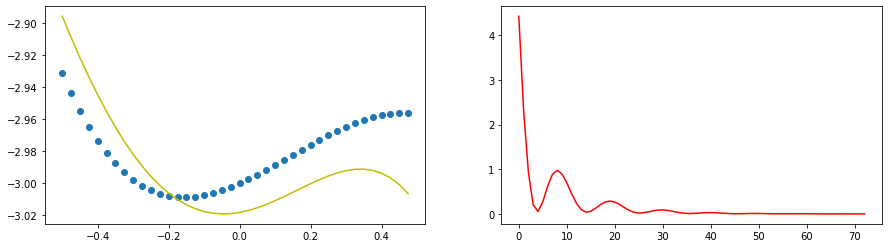

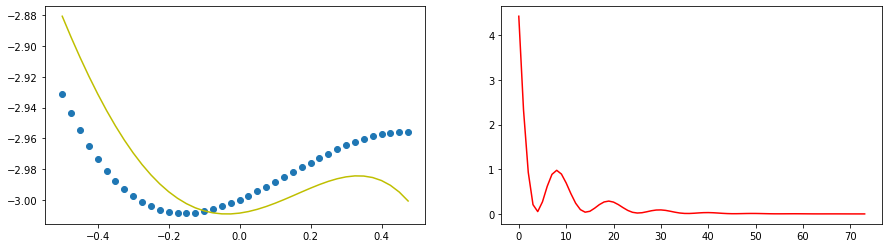

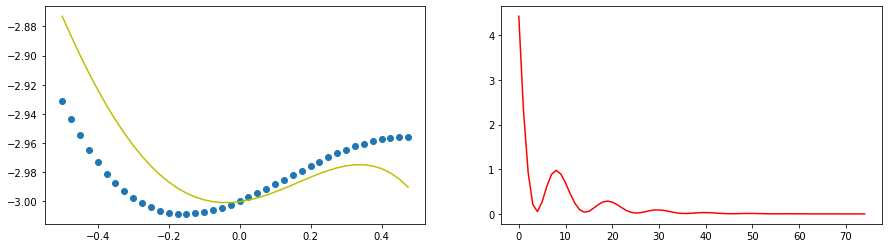

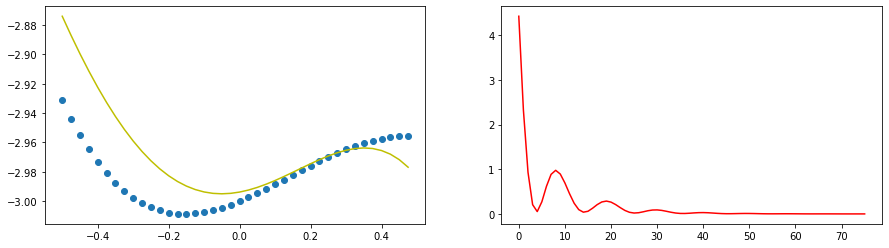

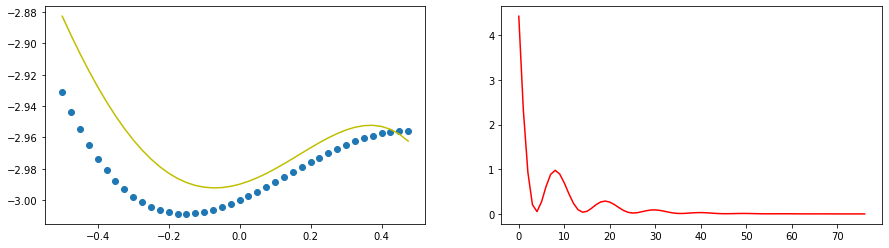

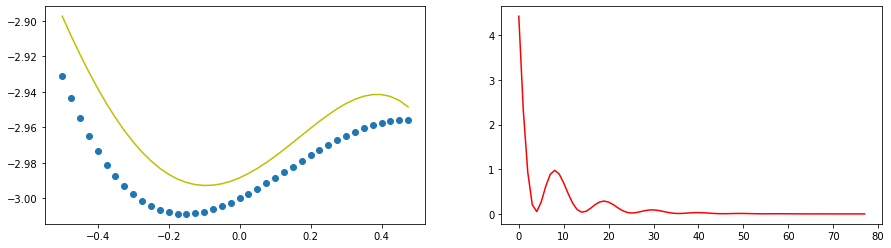

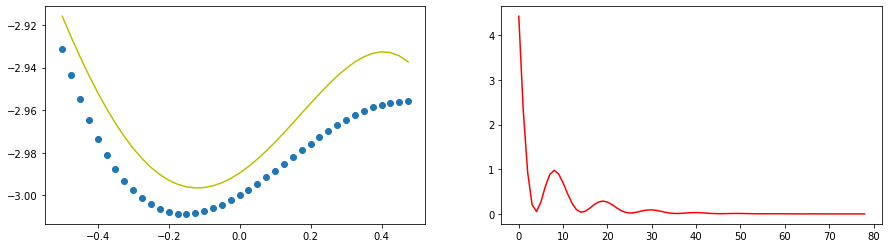

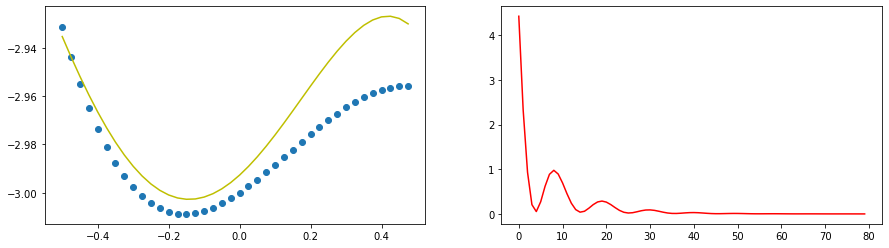

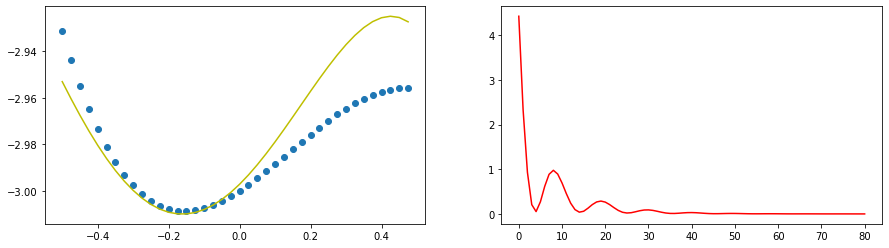

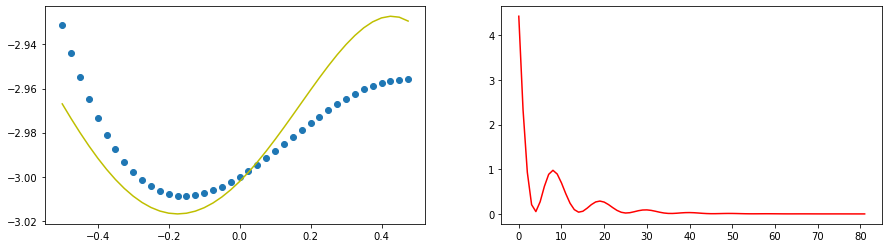

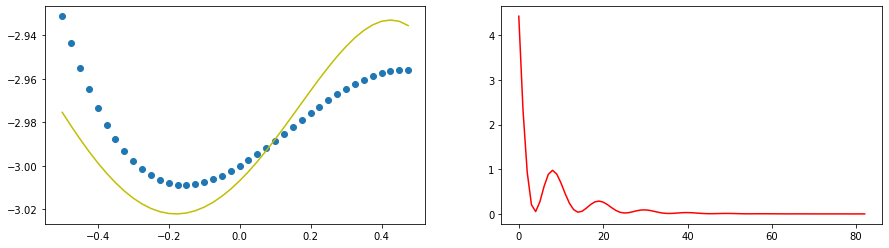

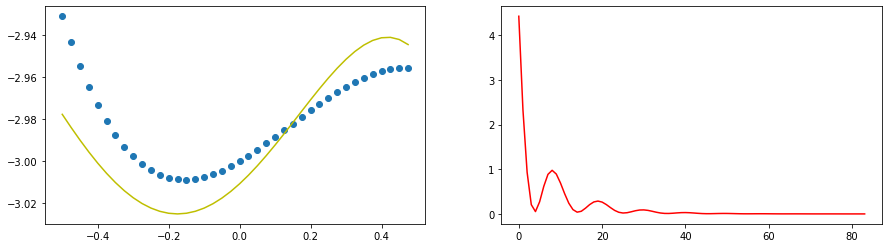

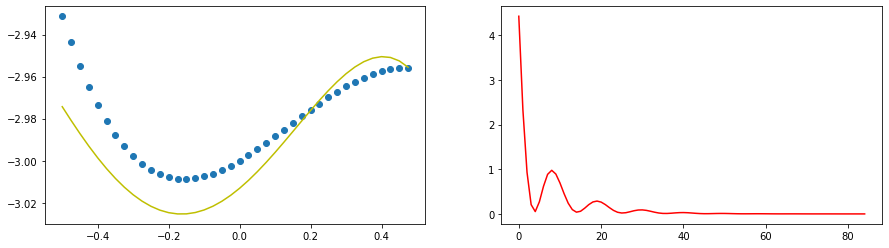

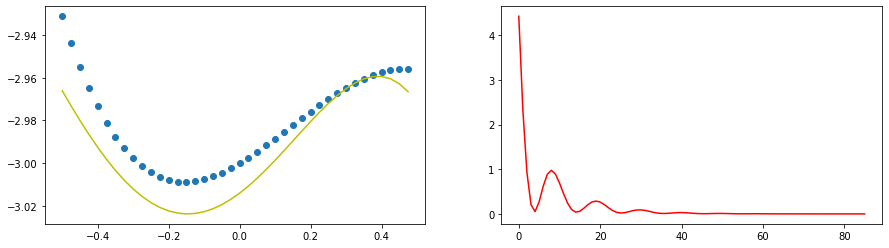

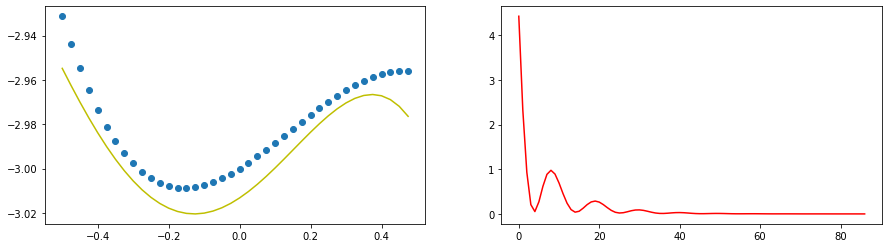

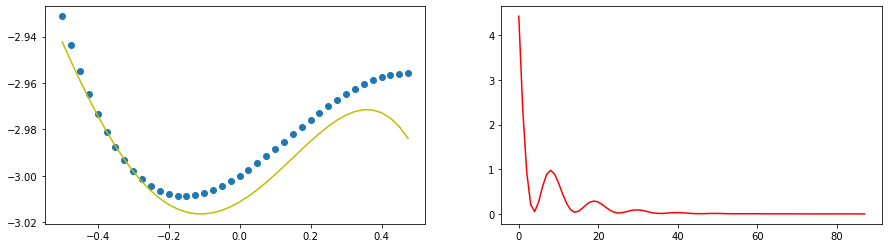

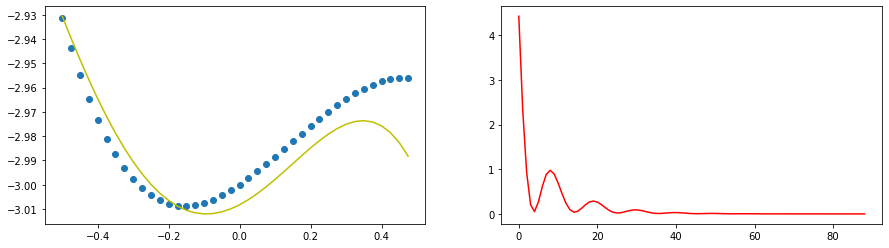

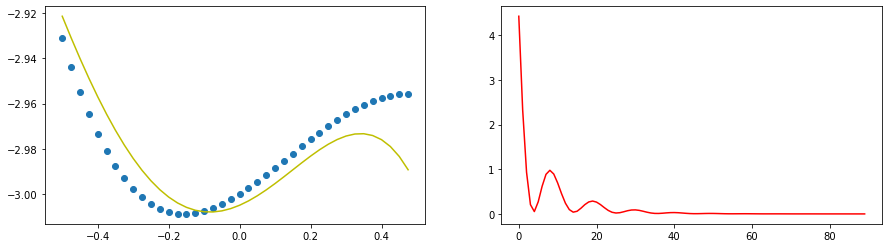

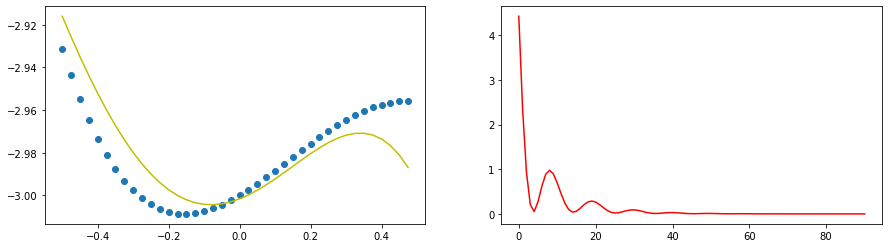

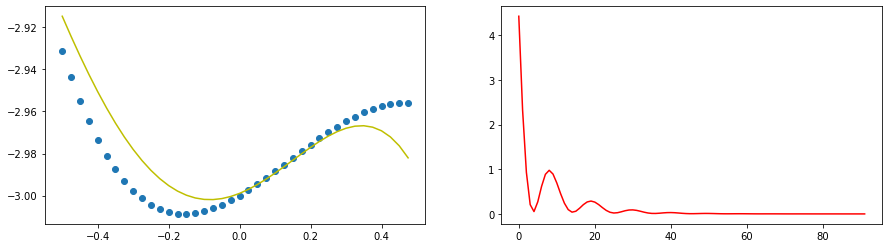

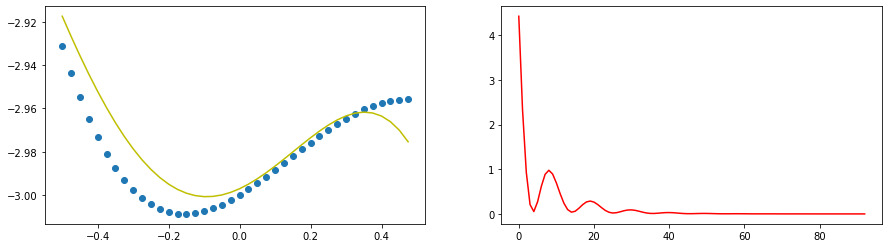

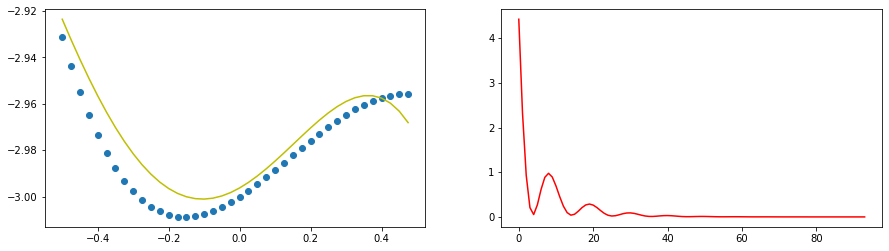

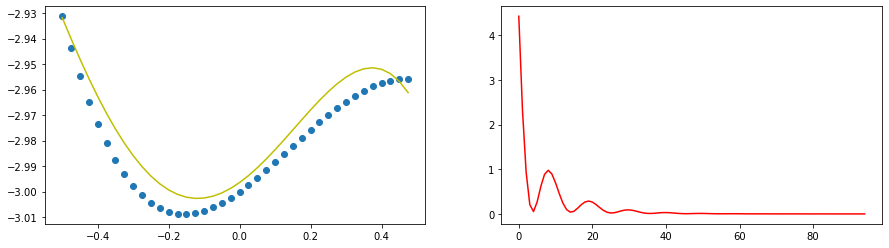

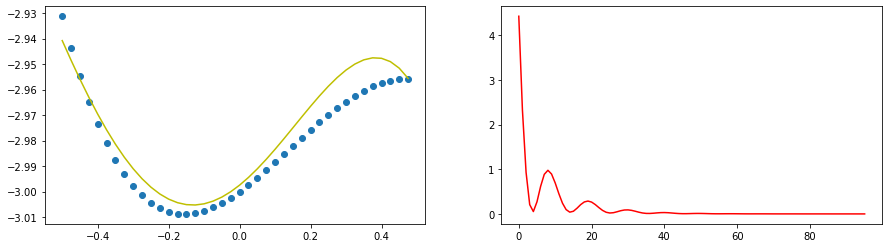

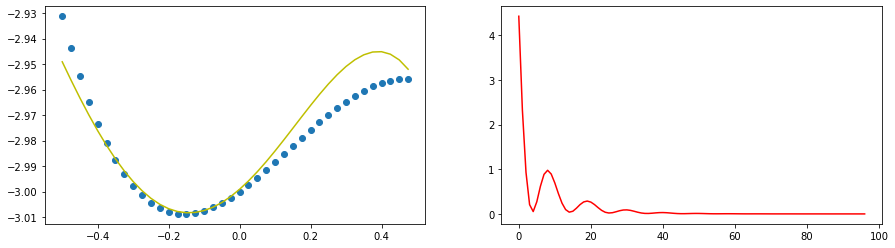

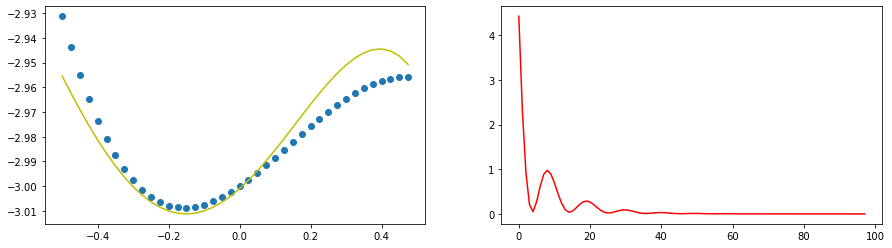

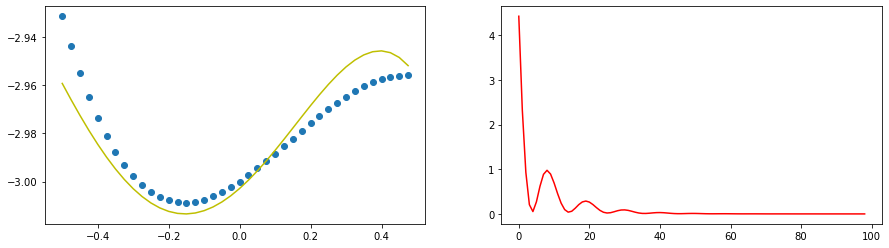

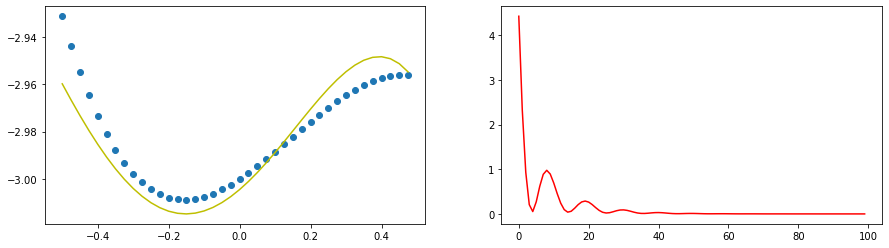

In [61]:
# Data points
x_training = torch.tensor(x_np)
y_training = torch.tensor(y_np)


lr = .5
iterations = 100

model = Model()

loss_hist = []

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for t in range(iterations):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_training)
    
    # Compute and print loss
    loss = loss_fn(y_pred, y_training)
    
    loss_hist.append(loss.item())
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(4)
    fig.set_figwidth(15)
    ax1.scatter(x_training,y_training)
    ax1.plot(x_training,y_pred.detach(),c="y")
    ax2.plot(loss_hist,c = "r")
    plt.show()
    

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()